<a href="https://colab.research.google.com/github/prasadboyina/statstical-learning/blob/main/linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('/content/insurance.csv')

dataset link:https://drive.google.com/file/d/1Zvjgv_-2FDi9QtuxT_lzZMLVV05eSYRs/view?usp=sharing

In [10]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [11]:
##step3:EDA (Exploratory data analysis)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
'''clean the data
1) Handle the Null /Missing values
2) Handle the duplicate values
'''

In [12]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [13]:
df.isnull().sum().sum()#total count of null values in each column

np.int64(52)

**if the count of null values is less than 30% of your data size-Delete the missing *data*

**if the count of null values is more than 30% of your data size-fill the missing data

In [14]:
(52/1338)*100

3.8863976083707024

In [15]:
#Drop the all null values
df.dropna(inplace=True)

In [16]:
df.isnull().sum().sum()

np.int64(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1287 non-null   float64
 1   sex                              1287 non-null   object 
 2   bmi                              1287 non-null   float64
 3   children                         1287 non-null   float64
 4   smoker                           1287 non-null   object 
 5   Claim_Amount                     1287 non-null   float64
 6   past_consultations               1287 non-null   float64
 7   num_of_steps                     1287 non-null   float64
 8   Hospital_expenditure             1287 non-null   float64
 9   NUmber_of_past_hospitalizations  1287 non-null   float64
 10  Anual_Salary                     1287 non-null   float64
 11  region                           1287 non-null   object 
 12  charges                  

How to Handle the duplicate values

In [18]:
print(df.duplicated().sum())

0


In [20]:
df.drop_duplicates(inplace=True)

In [19]:
print(df.duplicated().sum())

0


#encoding
we will use label Encoding that will convert all categorical values to numerical values bby alphabetical order

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
  if df[i].dtype=="object":
    df[i]=le.fit_transform(df[i])

In [22]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,0,35.530,0.0,1,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,1,55135.40209
1334,31.0,0,38.095,1.0,1,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,0,58571.07448
1335,52.0,1,34.485,3.0,1,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,1,60021.39897
1336,45.0,1,30.360,0.0,1,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,2,62592.87309


In [23]:
#divide the data into x and y means into independent variables(x) and dependent variable(y)
x=df.drop(columns="charges")
y=df["charges"]

In [24]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,0,35.530,0.0,1,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,1
1334,31.0,0,38.095,1.0,1,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,0
1335,52.0,1,34.485,3.0,1,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,1
1336,45.0,1,30.360,0.0,1,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,2


In [25]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1333,55135.40209
1334,58571.07448
1335,60021.39897
1336,62592.87309


In [26]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split ( x , y , train_size=0.8 , random_state=0)

In [27]:
# Independent variables of training data
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
510,44.0,1,34.320,1.0,0,16460.954610,22.0,883153.0,8.084459e+06,1.0,1.303457e+08,2
479,33.0,1,33.440,5.0,0,41495.241570,10.0,890208.0,2.395061e+06,1.0,1.055793e+08,2
316,29.0,0,24.600,2.0,0,5556.193100,12.0,827100.0,1.000335e+07,1.0,9.501109e+07,3
803,52.0,0,44.700,3.0,0,41327.384140,8.0,930768.0,2.155938e+06,1.0,2.025629e+08,3
528,18.0,0,29.165,0.0,0,8760.653674,10.0,903033.0,9.268380e+06,1.0,1.406115e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
802,52.0,0,38.380,2.0,0,12992.139950,24.0,933863.0,4.075903e+06,1.0,2.061268e+08,0
875,60.0,1,24.320,0.0,0,41844.564980,8.0,940821.0,1.191697e+07,1.0,1.629471e+08,1
1261,37.0,1,34.100,4.0,1,52206.093400,30.0,1068775.0,6.842734e+07,2.0,1.648384e+09,3
595,46.0,1,33.345,1.0,0,37775.304960,8.0,902540.0,5.910532e+06,1.0,1.470959e+08,0


In [28]:
# Dependent variables of training data
y_train

,charges
510,7147.472800
479,6653.788600
316,4529.477000
803,11411.685000
528,7323.734819
...,...
802,11396.900200
875,12523.604800
1261,40182.246000
595,8334.457550


# Model Building

In [29]:
# Create a Linear Regression model
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

In [30]:
# Train the Linear Regression model
model_1.fit(x_train , y_train)  # Pass the training data ( Give both Que and Ans so model can train itself)

LinearRegression()

In [31]:
# Ask the model to make prediction on unseen testing data

# This is exam time so we will give some question to model and ask the model for some answer

# Answer sheet = Student (Question paper)
model_answer =model_1.predict(x_test)

In [32]:
model_answer # Predicted values of charges

array([11107.17284012,  6137.892659  , 18312.68377331,  8089.75540244,
       11936.27615344,  4922.42289618, 17202.34428102,  9456.08754844,
        4450.35242048,  3153.62789127,  2518.26964427,  5285.75646651,
       42098.97528526, 37666.51463543,  5967.32942423, 47628.17289407,
        1517.54474189, 12383.34341638,  2594.28315461, 12558.57666485,
       11426.53556631,  -162.1319919 , 12478.67204816, 11511.50666766,
        -485.11436318,  4173.58780872,  4903.23483341,  4706.81341428,
       21338.87701093,  1822.70068655,  1388.39163607, 20297.93425148,
       29074.48774989, 13512.3689433 ,  9424.25146455,  5375.58800991,
        9855.77979779,  7313.96741755, 24956.10773109, 14315.2556751 ,
        7140.19532991, 10521.0466233 ,   890.56897008, 45798.6960069 ,
       14648.11592404, 39750.20923604, 38280.80540035,  2668.42535778,
        6429.61084813, 22741.13692804, 43650.61900105, 14860.73847879,
         616.2198075 ,  1768.78742214,  5600.65147376, 36672.64932604,
      

In [33]:
y_test # Actual answer

,charges
692,9722.76950
355,4931.64700
1050,19350.36890
512,7152.67140
845,11987.16820
...,...
793,11326.71487
1098,21984.47061
54,1711.02680
965,14394.55790


In [37]:
# Evaluate the performance of model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("R2 score of the model :" , r2_score(y_test ,model_answer )*100)
print("Avergae root error between actual charges amount and predicted charges amount is :" ,np.sqrt(mean_squared_error(y_test , model_answer)))

R2 score of the model : 99.22804056250362
Avergae root error between actual charges amount and predicted charges amount is : 998.9655604782844


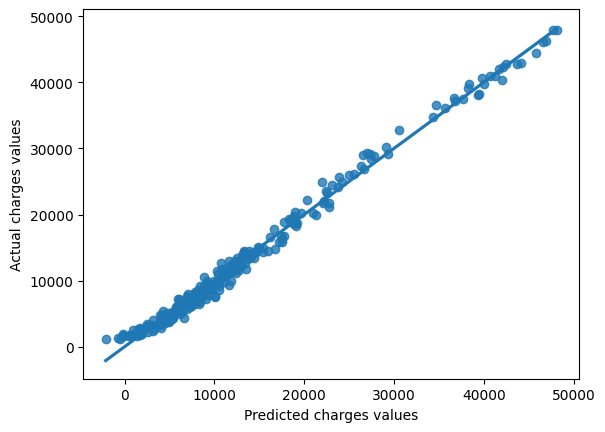

In [38]:
sns.regplot(x=model_answer , y=y_test)
plt.xlabel("Predicted charges values")
plt.ylabel("Actual charges values")
plt.show()

#Now our model is ready so what we will do we will pass our own data and we will ask the model to predict charges

In [35]:
#  model_1

# Now write a code to pass your own age , gendre , region and all features and ask the model to make prediction
import numpy as np
import pandas as pd

# Step 1: Take inputs from user
age = float(input("Enter age: "))
sex = int(input("Enter sex (0 = Female, 1 = Male): "))
bmi = float(input("Enter BMI: "))
children = int(input("Enter number of children: "))
smoker = int(input("Enter smoker (0 = No, 1 = Yes): "))
claim_amount = float(input("Enter claim amount: "))
past_consultations = int(input("Enter number of past consultations: "))
num_of_steps = float(input("Enter number of steps: "))
hospital_expenditure = float(input("Enter hospital expenditure: "))
past_hospitalizations = float(input("Enter number of past hospitalizations: "))
annual_salary = float(input("Enter annual salary: "))
region = int(input("Enter region (encoded value): "))

# Step 2: Create input array in correct order
input_data = np.array([[
    age,
    sex,
    bmi,
    children,
    smoker,
    claim_amount,
    past_consultations,
    num_of_steps,
    hospital_expenditure,
    past_hospitalizations,
    annual_salary,
    region
]])

# Optional: Convert to DataFrame (recommended)
input_df = pd.DataFrame(input_data, columns=[
    "age",
    "sex",
    "bmi",
    "children",
    "smoker",
    "Claim_Amount",
    "past_consultations",
    "num_of_steps",
    "Hospital_expenditure",
    "NUmber_of_past_hospitalizations",
    "Anual_Salary",
    "region"
])

# Step 3: Make prediction
predicted_charges = model_1.predict(input_df)

# Step 4: Output result
print(f"\nPredicted Insurance Charges: {predicted_charges[0]:,.2f}")

Enter age: 12
Enter sex (0 = Female, 1 = Male): 0
Enter BMI: 34.54
Enter number of children: 1
Enter smoker (0 = No, 1 = Yes): 0
Enter claim amount: 16460.986
Enter number of past consultations: 22
Enter number of steps: 45674443
Enter hospital expenditure: 5425485212
Enter number of past hospitalizations: 23
Enter annual salary: 25241888
Enter region (encoded value): 2

Predicted Insurance Charges: 1,488,798.98
